In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
census = pd.read_csv('census.csv')

In [4]:
census_population = census.sort_values(by='total_population',ascending=False)
census_population.head(10)

,postal_code,total_population,average_income_women,average_age_women,women_20_39
22,M2N,75100.0,51200.0,42.5,14445.0
0,M1B,65555.0,38360.0,41.9,9460.0
18,M2J,61761.0,43400.0,42.3,10455.0
66,M5V,59912.0,69200.0,34.6,20290.0
94,M9V,53878.0,34840.0,40.2,7975.0
14,M1V,50825.0,35720.0,45.9,6455.0
53,M5A,48978.0,57900.0,39.6,10635.0
6,M1K,48175.0,38320.0,41.8,6775.0
2,M1E,48033.0,42320.0,43.1,6335.0
15,M1W,47070.0,39480.0,47.6,5610.0


In [6]:
census['total_population'].describe()

count       96.000000
mean     29107.479167
std      14001.807265
min       3149.000000
25%      19270.500000
50%      26128.000000
75%      37867.000000
max      75100.000000
Name: total_population, dtype: float64

In [4]:
census_income = census.sort_values(by='average_income_women',ascending=False)
census_income.head(10)

,postal_code,total_population,average_income_women,average_age_women,women_20_39
48,M4T,10332.0,130800.0,47.4,1330.0
44,M4N,16058.0,114600.0,47.1,1630.0
50,M4W,15296.0,109500.0,45.8,2525.0
49,M4V,19273.0,95900.0,47.4,3155.0
38,M4G,19598.0,94300.0,44.1,2065.0
60,M5M,25495.0,90400.0,41.9,2535.0
83,M8X,10624.0,85200.0,49.3,975.0
63,M5R,26197.0,84200.0,46.2,5030.0
62,M5P,19791.0,84200.0,45.5,3110.0
26,M3B,12880.0,83100.0,47.1,1215.0


In [7]:
census['average_income_women'].describe()

count        96.000000
mean      56526.875000
std       19409.730404
min       31440.000000
25%       41530.000000
50%       51750.000000
75%       66975.000000
max      130800.000000
Name: average_income_women, dtype: float64

In [8]:
census_age = census.sort_values(by='average_age_women',ascending=True)
census_age.head(10)

,postal_code,total_population,average_income_women,average_age_women,women_20_39
58,M5H,3248.0,64400.0,34.6,1055.0
66,M5V,59912.0,69200.0,34.6,20290.0
57,M5G,9751.0,52450.0,35.0,3180.0
54,M5B,17422.0,47920.0,36.1,5105.0
39,M4H,18698.0,31440.0,37.0,2625.0
52,M4Y,36319.0,51450.0,37.2,9960.0
59,M5J,16879.0,68900.0,39.5,4680.0
53,M5A,48978.0,57900.0,39.6,10635.0
74,M6K,42110.0,54100.0,39.7,10395.0
16,M1X,14810.0,38520.0,39.9,2145.0


In [9]:
census['average_age_women'].describe()

count    96.000000
mean     42.645833
std       2.867455
min      34.600000
25%      41.125000
50%      42.450000
75%      44.225000
max      49.300000
Name: average_age_women, dtype: float64

In [6]:
census_count = census.sort_values(by='women_20_39',ascending=False)
census_count.head(10)

,postal_code,total_population,average_income_women,average_age_women,women_20_39
66,M5V,59912.0,69200.0,34.6,20290.0
22,M2N,75100.0,51200.0,42.5,14445.0
53,M5A,48978.0,57900.0,39.6,10635.0
18,M2J,61761.0,43400.0,42.3,10455.0
74,M6K,42110.0,54100.0,39.7,10395.0
52,M4Y,36319.0,51450.0,37.2,9960.0
0,M1B,65555.0,38360.0,41.9,9460.0
72,M6H,43730.0,51700.0,41.5,8565.0
81,M8V,44144.0,59200.0,43.0,8165.0
94,M9V,53878.0,34840.0,40.2,7975.0


In [10]:
census['women_20_39'].describe()

count       96.000000
mean      4658.125000
std       2927.055845
min        790.000000
25%       2718.750000
50%       4395.000000
75%       5613.750000
max      20290.000000
Name: women_20_39, dtype: float64

In [9]:
def analyze_locations(df):
    """
    Analyze potential locations for a nail salon business
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing census data with columns:
        - total_population
        - average_income_women
        - average_age_women
        - women_20_39
    
    Returns:
    pandas.DataFrame: DataFrame with location scores and rankings
    """
    
    # Create a copy of the DataFrame for analysis
    analysis_df = census.copy()
    
    # 1. Calculate scores for each factor (normalized to 0-1 scale)
    
    # Population density score (more population = better)
    analysis_df['population_score'] = (
        (df['total_population'] - df['total_population'].min()) / 
        (df['total_population'].max() - df['total_population'].min())
    )
    
    # Target demographic score (more women aged 20-39 = better)
    analysis_df['target_demo_score'] = (
        (df['women_20_39'] - df['women_20_39'].min()) / 
        (df['women_20_39'].max() - df['women_20_39'].min())
    )
    
    # Income score (higher average women's income = better)
    analysis_df['income_score'] = (
        (df['average_income_women'] - df['average_income_women'].min()) / 
        (df['average_income_women'].max() - df['average_income_women'].min())
    )
    
    # Age score (preference for areas with younger average age of women)
    # Reverse the scale since lower average age is better for nail salon business
    analysis_df['age_score'] = (
        1 - (df['average_age_women'] - df['average_age_women'].min()) / 
        (df['average_age_women'].max() - df['average_age_women'].min())
    )
    
    # 2. Add percentage of women 20-39 compared to total population as a new data point
    analysis_df['pct_target'] = (analysis_df['women_20_39'] / analysis_df['total_population'])
    analysis_df['pct_target_score'] = (
        (analysis_df['pct_target'] - analysis_df['pct_target'].min()) / 
        (analysis_df['pct_target'].max() - analysis_df['pct_target'].min())
    )
    
    # 3. Calculate weighted total score
    weights = {
        'population_score': 0.2,    
        'target_demo_score': 0.2,   
        'income_score': 0.20,        
        'age_score': 0.20,           
        'pct_target_score': 0.20
    }
    
    analysis_df['total_score'] = (
        analysis_df['population_score'] * weights['population_score'] +
        analysis_df['target_demo_score'] * weights['target_demo_score'] +
        analysis_df['income_score'] * weights['income_score'] +
        analysis_df['age_score'] * weights['age_score']+
        analysis_df['pct_target_score'] * weights['pct_target_score']
    )
    
    # 4. Rank locations
    analysis_df['rank'] = analysis_df['total_score'].rank(ascending=False)

    
    # 5. Create detailed analysis report
    detailed_report = analysis_df.sort_values('total_score', ascending=False)
    
    return detailed_report

In [10]:
results_df = analyze_locations(census)
results_df

,postal_code,total_population,average_income_women,average_age_women,women_20_39,population_score,target_demo_score,income_score,age_score,pct_target,pct_target_score,total_score,rank
66,M5V,59912.0,69200.0,34.6,20290.0,0.788912,1.000000,0.380032,1.000000,0.338663,1.000000,0.833789,1.0
22,M2N,75100.0,51200.0,42.5,14445.0,1.000000,0.700256,0.198873,0.462585,0.192344,0.407348,0.553812,2.0
52,M4Y,36319.0,51450.0,37.2,9960.0,0.461008,0.470256,0.201389,0.823129,0.274237,0.739047,0.538966,3.0
53,M5A,48978.0,57900.0,39.6,10635.0,0.636947,0.504872,0.266304,0.659864,0.217138,0.507777,0.515153,4.0
74,M6K,42110.0,54100.0,39.7,10395.0,0.541494,0.492564,0.228060,0.653061,0.246853,0.628134,0.508663,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,M9P,20645.0,50320.0,46.5,2505.0,0.243165,0.087949,0.190016,0.190476,0.121337,0.119744,0.166270,92.0
89,M9L,11737.0,34720.0,43.6,1570.0,0.119359,0.040000,0.033011,0.387755,0.133765,0.170082,0.150042,93.0
17,M2H,23396.0,45600.0,47.9,2800.0,0.281400,0.103077,0.142512,0.095238,0.119679,0.113027,0.147051,94.0
34,M4A,14589.0,43200.0,45.9,1865.0,0.158997,0.055128,0.118357,0.231293,0.127836,0.146068,0.141969,95.0


In [11]:
# Print top 5 locations with details
print("\nTop 5 Recommended Locations for Nail Salon:")
print("==========================================")
for _, row in results_df.head().iterrows():
    print(f"\nPostal Code: {row['postal_code']}")
    print(f"Overall Rank: {int(row['rank'])}")
    print(f"Total Score: {row['total_score']:.3f}")
    print(f"Total Population: {row['total_population']:,.0f}")
    print(f"Women Ages 20-39: {row['women_20_39']:,.0f}")
    print(f"Average Women's Income: ${row['average_income_women']:,.2f}")
    print(f"Average Women's Age: {row['average_age_women']:.1f}")

    # Calculate percentage of women 20-39 compared to total population
    pct_target = (row['women_20_39'] / row['total_population']) * 100
    print(f"Percentage of Target Demographic: {pct_target:.1f}%")


Top 5 Recommended Locations for Nail Salon:

Postal Code: M5V
Overall Rank: 1
Total Score: 0.834
Total Population: 59,912
Women Ages 20-39: 20,290
Average Women's Income: $69,200.00
Average Women's Age: 34.6
Percentage of Target Demographic: 33.9%

Postal Code: M2N
Overall Rank: 2
Total Score: 0.554
Total Population: 75,100
Women Ages 20-39: 14,445
Average Women's Income: $51,200.00
Average Women's Age: 42.5
Percentage of Target Demographic: 19.2%

Postal Code: M4Y
Overall Rank: 3
Total Score: 0.539
Total Population: 36,319
Women Ages 20-39: 9,960
Average Women's Income: $51,450.00
Average Women's Age: 37.2
Percentage of Target Demographic: 27.4%

Postal Code: M5A
Overall Rank: 4
Total Score: 0.515
Total Population: 48,978
Women Ages 20-39: 10,635
Average Women's Income: $57,900.00
Average Women's Age: 39.6
Percentage of Target Demographic: 21.7%

Postal Code: M6K
Overall Rank: 5
Total Score: 0.509
Total Population: 42,110
Women Ages 20-39: 10,395
Average Women's Income: $54,100.00
Av

In [12]:
toronto_DF = pd.read_csv('postalcode.csv')
toronto_DF

,Postalcode,Latitude,Longitude,Borough,Neighbourhood
0,M1B,43.806686,-79.194353,Scarborough,"Malvern, Rouge"
1,M1C,43.784535,-79.160497,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,43.763573,-79.188711,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,43.770992,-79.216917,Scarborough,Woburn
4,M1H,43.773136,-79.239476,Scarborough,Cedarbrae
...,...,...,...,...,...
98,M9N,43.706876,-79.518188,York,Weston
99,M9P,43.696319,-79.532242,Etobicoke,Westmount
100,M9R,43.688905,-79.554724,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,43.739416,-79.588437,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


In [13]:
toronto_DF = toronto_DF.rename(columns = {'Postalcode': 'postal_code'})
toronto_DF

,postal_code,Latitude,Longitude,Borough,Neighbourhood
0,M1B,43.806686,-79.194353,Scarborough,"Malvern, Rouge"
1,M1C,43.784535,-79.160497,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,43.763573,-79.188711,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,43.770992,-79.216917,Scarborough,Woburn
4,M1H,43.773136,-79.239476,Scarborough,Cedarbrae
...,...,...,...,...,...
98,M9N,43.706876,-79.518188,York,Weston
99,M9P,43.696319,-79.532242,Etobicoke,Westmount
100,M9R,43.688905,-79.554724,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,43.739416,-79.588437,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


In [14]:
census_analysis = pd.merge(toronto_DF,results_df,how="right",on="postal_code") 
census_analysis

,postal_code,Latitude,Longitude,Borough,Neighbourhood,total_population,average_income_women,average_age_women,women_20_39,population_score,target_demo_score,income_score,age_score,pct_target,pct_target_score,total_score,rank
0,M5V,43.628947,-79.394420,Downtown Toronto,"CN Tower, King and Spadina, Railway Lands, Har...",59912.0,69200.0,34.6,20290.0,0.788912,1.000000,0.380032,1.000000,0.338663,1.000000,0.833789,1.0
1,M2N,43.770120,-79.408493,North York,Willowdale South,75100.0,51200.0,42.5,14445.0,1.000000,0.700256,0.198873,0.462585,0.192344,0.407348,0.553812,2.0
2,M4Y,43.665860,-79.383160,Downtown Toronto,Church and Wellesley,36319.0,51450.0,37.2,9960.0,0.461008,0.470256,0.201389,0.823129,0.274237,0.739047,0.538966,3.0
3,M5A,43.654260,-79.360636,Downtown Toronto,"Regent Park, Harbourfront",48978.0,57900.0,39.6,10635.0,0.636947,0.504872,0.266304,0.659864,0.217138,0.507777,0.515153,4.0
4,M6K,43.636847,-79.428191,West Toronto,"Brockton, Parkdale Village, Exhibition Place",42110.0,54100.0,39.7,10395.0,0.541494,0.492564,0.228060,0.653061,0.246853,0.628134,0.508663,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,M9P,43.696319,-79.532242,Etobicoke,Westmount,20645.0,50320.0,46.5,2505.0,0.243165,0.087949,0.190016,0.190476,0.121337,0.119744,0.166270,92.0
92,M9L,43.756303,-79.565963,North York,Humber Summit,11737.0,34720.0,43.6,1570.0,0.119359,0.040000,0.033011,0.387755,0.133765,0.170082,0.150042,93.0
93,M2H,43.803762,-79.363452,North York,Hillcrest Village,23396.0,45600.0,47.9,2800.0,0.281400,0.103077,0.142512,0.095238,0.119679,0.113027,0.147051,94.0
94,M4A,43.725882,-79.315572,North York,Victoria Village,14589.0,43200.0,45.9,1865.0,0.158997,0.055128,0.118357,0.231293,0.127836,0.146068,0.141969,95.0


In [15]:
census_analysis.to_csv('census_analysis.csv',index=False) 

In [16]:
def create_location_map(df, toronto_df):
    """
    Create a map visualization of location scores
    """
    plt.figure(figsize=(15, 10))
    
    # Merge analysis results with geographic data
    map_data = toronto_df.merge(df[['postal_code', 'total_score']], 
                               left_on='postal_code', 
                               right_on='postal_code')
    
    # Create scatter plot
    scatter = plt.scatter(
        map_data['Longitude'], 
        map_data['Latitude'],
        c=map_data['total_score'],
        cmap='YlOrRd',
        s=100 * map_data['total_score'],  # Size points by score
        alpha=0.6
    )
    
    # Add postal code labels for top locations
    top_5 = df.nlargest(5, 'total_score')
    for _, row in top_5.iterrows():
        location_data = map_data[map_data['postal_code'] == row['postal_code']].iloc[0]
        plt.annotate(
            f"{row['postal_code']}\n(Score: {row['total_score']:.2f})",
            (location_data['Longitude'], location_data['Latitude']),
            xytext=(10, 10),
            textcoords='offset points',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
        )
    
    plt.colorbar(scatter, label='Location Score')
    plt.title('Nail Salon Location Analysis Map')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('location_map.png')

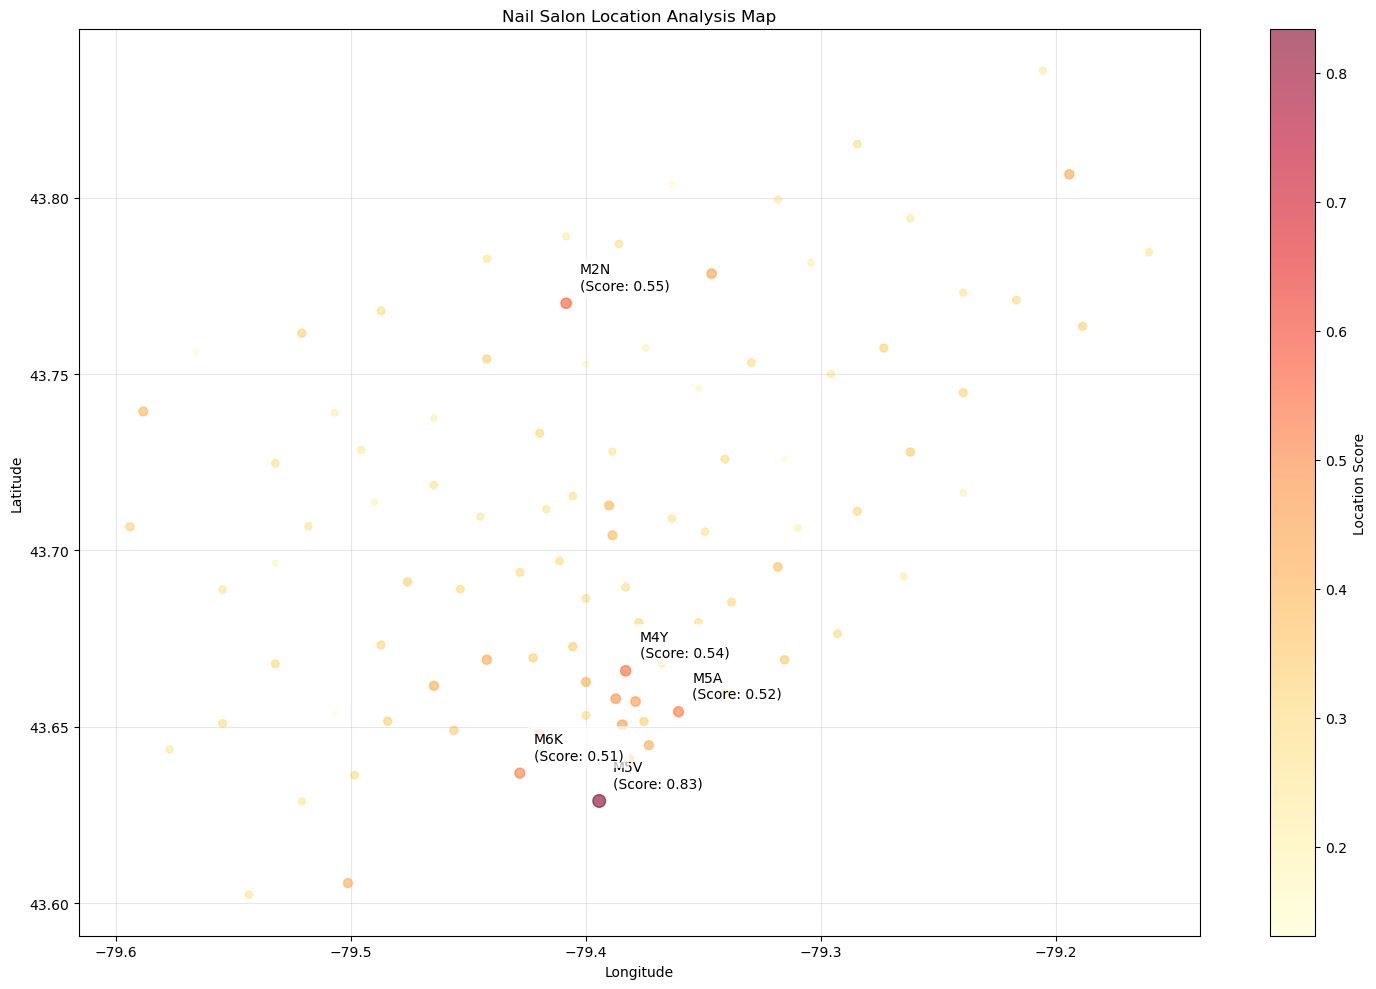

In [17]:
create_location_map(results_df, toronto_DF)

In [22]:
df = pd.DataFrame({
    'Score Type': ['Age Score', 'Income Score', 'Population Score', 
                  'Target Demo Score', 'Target Pct Score', 'Total Score'],
    'M5V': [1.000, 0.380, 0.789, 1.000, 1.000, 0.834],
    'M2N': [0.463, 0.199, 1.000, 0.700, 0.407, 0.554],
    'M4Y': [0.823, 0.201, 0.461, 0.470, 0.739, 0.539],
    'M5A': [0.660, 0.266, 0.637, 0.505, 0.508, 0.515],
    'M6K': [0.653, 0.228, 0.541, 0.493, 0.547, 0.432]
})
df

,Score Type,M5V,M2N,M4Y,M5A,M6K
0,Age Score,1.000,0.463,0.823,0.660,0.653
1,Income Score,0.380,0.199,0.201,0.266,0.228
2,Population Score,0.789,1.000,0.461,0.637,0.541
3,Target Demo Score,1.000,0.700,0.470,0.505,0.493
4,Target Pct Score,1.000,0.407,0.739,0.508,0.547
5,Total Score,0.834,0.554,0.539,0.515,0.432


In [24]:
df.to_csv('score_comparison.csv',index=False) 